In [359]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from models.SVM import MultiClassSVM
from sklearn.model_selection import KFold

In [360]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [362]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [363]:
svm_model = MultiClassSVM(standardize=False, kernel='rbf', C=0.6, sigma=3.0)
svm_model.fit(X_train.values, y_train.values)

     pcost       dcost       gap    pres   dres
 0: -4.0080e+00 -8.8941e+01  5e+02  3e+00  4e-16
 1: -2.1870e+00 -4.7966e+01  5e+01  5e-02  4e-16
 2: -3.2597e+00 -9.1058e+00  6e+00  5e-03  4e-16
 3: -4.1012e+00 -6.0443e+00  2e+00  1e-03  3e-16
 4: -4.3763e+00 -5.3512e+00  1e+00  6e-04  3e-16
 5: -4.5911e+00 -4.9746e+00  4e-01  1e-04  3e-16
 6: -4.6704e+00 -4.8073e+00  1e-01  1e-05  4e-16
 7: -4.7045e+00 -4.7573e+00  5e-02  5e-07  4e-16
 8: -4.7271e+00 -4.7288e+00  2e-03  2e-08  5e-16
 9: -4.7278e+00 -4.7278e+00  2e-05  2e-10  4e-16
10: -4.7278e+00 -4.7278e+00  2e-07  2e-12  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2082e+01 -1.3073e+02  6e+02  3e+00  1e-15
 1: -2.2977e+01 -9.1776e+01  7e+01  1e-15  8e-16
 2: -2.6111e+01 -3.7702e+01  1e+01  2e-16  7e-16
 3: -2.8772e+01 -3.2309e+01  4e+00  7e-16  9e-16
 4: -2.9504e+01 -3.0849e+01  1e+00  2e-16  7e-16
 5: -2.9800e+01 -3.0268e+01  5e-01  3e-16  9e-16
 6: -2.9916e+01 -3.0084e+01  2e-01  7e-16  8e-1

In [364]:
y_pred = svm_model.predict(X_test.values)

accuracy = svm_model.score(X_test.values, y_test.values)
metrics = svm_model.metrics(X_test.values, y_test.values)

print(f"Accuracy: {accuracy}")
print(f"Precision: {metrics['precision']}")
print(f"Recall: {metrics['recall']}")
print(f"F1 Score: {metrics['f1_score']}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


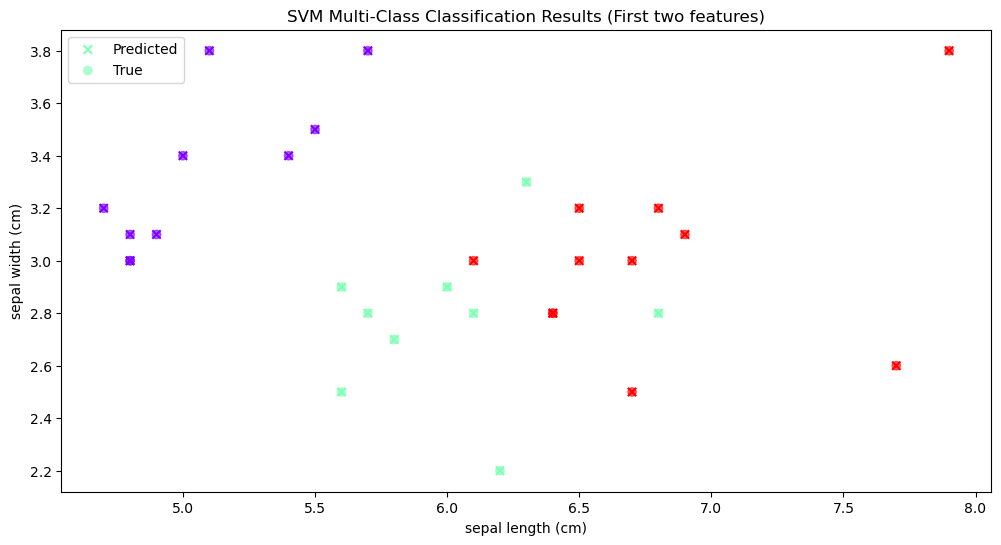

In [365]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_pred, cmap='rainbow', marker='x', label='Predicted')
plt.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test.values, cmap='rainbow', alpha=0.6, label='True')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')
plt.title('SVM Multi-Class Classification Results (First two features)')
plt.show()

In [366]:
# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Convert multiclass labels to binary labels
y = np.where(y == 2, -1, y)

# Define parameters
kf = KFold(n_splits=5)  # 5-fold cross-validation
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train and evaluate the model
    svm_model = MultiClassSVM(standardize=False, kernel='rbf', C=0.9, sigma=3.0)
    svm_model.fit(X_train, y_train)
    accuracies.append(svm_model.score(X_test, y_test))

# Calculate the average accuracy
average_accuracy = np.mean(accuracies)

print(f"Average accuracy over 5 folds: {average_accuracy:.2f}")

     pcost       dcost       gap    pres   dres
 0: -3.0510e+01 -1.8518e+02  7e+02  2e+00  2e-15
 1: -2.3107e+01 -1.0571e+02  9e+01  4e-02  3e-15
 2: -2.7909e+01 -4.0141e+01  1e+01  5e-03  3e-15
 3: -3.1821e+01 -3.5188e+01  3e+00  1e-03  3e-15
 4: -3.2817e+01 -3.4075e+01  1e+00  3e-04  3e-15
 5: -3.3326e+01 -3.3440e+01  1e-01  2e-05  3e-15
 6: -3.3379e+01 -3.3382e+01  3e-03  4e-07  4e-15
 7: -3.3381e+01 -3.3381e+01  1e-04  8e-09  3e-15
 8: -3.3381e+01 -3.3381e+01  4e-06  1e-10  3e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.8672e+00 -1.3447e+02  5e+02  2e+00  7e-16
 1: -1.8206e+00 -5.5641e+01  6e+01  4e-02  8e-16
 2: -3.1392e+00 -1.2383e+01  1e+01  6e-03  7e-16
 3: -4.1638e+00 -7.1345e+00  3e+00  2e-03  6e-16
 4: -4.5620e+00 -5.8732e+00  1e+00  6e-04  5e-16
 5: -4.8074e+00 -5.3298e+00  5e-01  2e-04  6e-16
 6: -4.9581e+00 -5.0617e+00  1e-01  1e-15  7e-16
 7: -5.0013e+00 -5.0064e+00  5e-03  5e-16  6e-16
 8: -5.0034e+00 -5.0035e+00  9e-05  2e-16  6e-1

After implementing cross-validation, we can confidently ascertain that our model did not succumb to overfitting, which stands as a strong indicator.